# Programming assignment 1: Visualizing COVID-19 data

## Disclaimer!!

##### - This is not an epidemiology study. It is simply a visualization exercise. Some epidemiology terms may not be correct. related to this [tweet.](https://twitter.com/tobiasgalla/status/1245612214632902656)
##### - ”Not enough testing was done in my country” is a true statement for every country/province/county/city. This is the data we have to work and infer some understanding of what’s happening. Data is always incomplete and inaccurate.
##### - Please use only the raw data I share. This makes marking consistent for the TAs. You can use more recent data to further customize your own dashboard outside this assignment.

# Geographic distribution of worldwide COVID-19 data

# 5. Task #2: Plot the profile rates per 1M residents

Since the countries populations vary a lot, counting the absolute cases and deaths is not a
fair metric. Normalizing the cases and deaths per 1 million residents is a typical procedure
to get an unbiased view of the data. To do do, simply use the logic below:

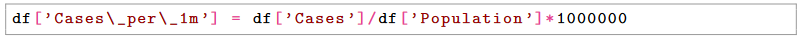

##### Use the same logic we used in Section #3 (steps 12-13) to plot the 2×2 subplots with:

##### a) cumulative infection rate per 1M
##### b) cumulative mortality rate per 1M

##### Here, notice that the cumulative rate profiles are smooth and you don’t need to calculate the moving average. Also, in both cases, make sure that you sort by each rate per 1M so that the top 5 countries appear in the [0, 0] subplot (top left), the 6-10 appear in the [0, 1] subplot (top right), and so on.

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from scipy import stats
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

import warnings
warnings.filterwarnings('ignore')

In [2]:
cumalative_covid = pd.read_excel('Covid_A_Master_Cumalative_Table.xlsx')
cumalative_covid.drop(columns = ['Unnamed: 0'], inplace = True)
cumalative_covid

,Cases,Deaths,Date,Country,Population,Continent
0,0,0,2019-12-31,Afghanistan,38041757.0,Asia
1,0,0,2019-12-31,Algeria,43053054.0,Africa
2,0,0,2019-12-31,Armenia,2957728.0,Europe
3,0,0,2019-12-31,Australia,25203200.0,Oceania
4,0,0,2019-12-31,Austria,8858775.0,Europe
...,...,...,...,...,...,...
38906,1034,30,2020-08-27,Vietnam,96462108.0,Asia
38907,766,1,2020-08-27,Western_Sahara,582458.0,Africa
38908,1930,560,2020-08-27,Yemen,29161922.0,Asia
38909,11376,282,2020-08-27,Zambia,17861034.0,Africa


In [3]:
last_day_per_year = cumalative_covid.groupby(by = ['Country'])['Date'].max()
last_day_per_year = last_day_per_year.to_frame()
last_day_per_year.reset_index()

,Country,Date
0,Afghanistan,2020-08-27
1,Albania,2020-08-27
2,Algeria,2020-08-27
3,Andorra,2020-08-27
4,Angola,2020-08-27
...,...,...
205,Vietnam,2020-08-27
206,Western_Sahara,2020-08-27
207,Yemen,2020-08-27
208,Zambia,2020-08-27


In [4]:
last_day = pd.merge(cumalative_covid, last_day_per_year, how = 'inner', 
                    left_on = ['Country', 'Date'], right_on = ['Country', 'Date'])
last_day = last_day.sort_values(by = 'Cases', ascending = False)
last_day = last_day.reset_index()

In [5]:
N = 20
top_countries = last_day[:N]['Country'].to_list()
# top_countries

In [6]:
K = 10
top_countries_infection = cumalative_covid[cumalative_covid.Country.isin(top_countries)]
top_countries_infection = top_countries_infection[top_countries_infection['Cases'] > K]
# top_countries_infection

In [7]:
day_0_for_every_country = top_countries_infection.groupby(by = ['Country']).min()
day_0_for_every_country = day_0_for_every_country['Date']
day_0_for_every_country.to_frame()

,Date
Country,
Argentina,2020-03-09
Bangladesh,2020-03-21
Brazil,2020-03-07
Chile,2020-03-10
Colombia,2020-03-14
France,2020-02-08
Germany,2020-02-04
India,2020-03-05
Iran,2020-02-22


In [8]:
top_countries_infection = top_countries_infection.merge(day_0_for_every_country, how = 'inner', on = 'Country')
top_countries_infection = top_countries_infection.rename(columns = {'Date_y': 'Date_0'})
top_countries_infection['Days from 0'] = (top_countries_infection['Date_x'] - top_countries_infection['Date_0']).dt.days
top_countries_infection['Case fatality rate'] = (top_countries_infection['Deaths'] / top_countries_infection['Cases']) * 100
top_countries_infection['Infection rate per million'] = (top_countries_infection['Cases'] / top_countries_infection['Population']) * 1000000
top_countries_infection['Mortality rate per million'] = (top_countries_infection['Deaths'] / top_countries_infection['Population']) * 1000000
top_countries_infection = top_countries_infection.sort_values('Infection rate per million', ascending = False)
top_countries_infection

,Cases,Deaths,Date_x,Country,Population,Continent,Date_0,Days from 0,Case fatality rate,Infection rate per million,Mortality rate per million
2221,402365,10990,2020-08-27,Chile,1.895204e+07,America,2020-03-10,170,2.731351,21230.701611,579.884957
2220,400985,10958,2020-08-26,Chile,1.895204e+07,America,2020-03-10,169,2.732771,21157.886211,578.196484
2219,399568,10916,2020-08-25,Chile,1.895204e+07,America,2020-03-10,168,2.731951,21083.118515,575.980363
2218,397665,10852,2020-08-24,Chile,1.895204e+07,America,2020-03-10,167,2.728930,20982.707134,572.603417
2217,395708,10792,2020-08-23,Chile,1.895204e+07,America,2020-03-10,166,2.727264,20879.446455,569.437530
...,...,...,...,...,...,...,...,...,...,...,...
1364,44,0,2020-03-10,India,1.366418e+09,Asia,2020-03-05,5,0.000000,0.032201,0.000000
1363,34,0,2020-03-08,India,1.366418e+09,Asia,2020-03-05,3,0.000000,0.024883,0.000000
1362,31,0,2020-03-07,India,1.366418e+09,Asia,2020-03-05,2,0.000000,0.022687,0.000000
1361,29,0,2020-03-06,India,1.366418e+09,Asia,2020-03-05,1,0.000000,0.021223,0.000000


In [9]:
max_cases = top_countries_infection.groupby(by = 'Country').max()
max_cases = max_cases.sort_values('Infection rate per million', ascending = False)
max_cases

,Cases,Deaths,Date_x,Population,Continent,Date_0,Days from 0,Case fatality rate,Infection rate per million,Mortality rate per million
Country,,,,,,,,,,
Chile,402365,10990,2020-08-27,1.895204e+07,America,2020-03-10,170,2.732771,21230.701611,579.884957
Peru,613378,28124,2020-08-27,3.251046e+07,America,2020-03-11,169,5.048859,18867.095768,865.075372
USA,5821876,179714,2020-08-27,3.290649e+08,America,2020-02-03,206,7.200000,17692.180780,546.135400
Brazil,3717156,117665,2020-08-27,2.110495e+08,America,2020-03-07,173,6.993168,17612.719601,557.523185
Colombia,572270,18184,2020-08-27,5.033944e+07,America,2020-03-14,166,4.752326,11368.222727,361.227676
S.Africa,615701,13502,2020-08-27,5.855827e+07,Africa,2020-03-12,168,2.200861,10514.330965,230.573763
S.Arabia,310836,3755,2020-08-27,3.426853e+07,Asia,2020-03-09,171,1.506143,9070.596523,109.575757
Spain,419849,28971,2020-08-26,4.693706e+07,Europe,2020-02-27,181,12.194832,8944.936048,617.230819
Argentina,370175,7839,2020-08-27,4.478068e+07,America,2020-03-09,171,8.333333,8266.400629,175.053190


## A) Cumulative Infection Rate per 1M

In [10]:
# back_calc IS THE BACK WINDOW THAT IS USED TO CALCULATE THE SLOPE
back_calc = 2
slope_df = pd.DataFrame(columns=['Country', 'Days from 0', 'Slope', 'R2', 'P_value'])

for country in top_countries:
    one_country_data = top_countries_infection[top_countries_infection['Country'] == str(country)].reset_index(drop=True)
#     one_country_data['log_cases'] = np.log10(one_country_data['Cases'])
    for i in np.arange(back_calc, len(one_country_data)+1):
        x = one_country_data.loc[i-back_calc: i, 'Days from 0'] # That is the 'Days_from_0'
        y = one_country_data.loc[i-back_calc: i, 'Infection rate per million'] # 
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        one_country_data.loc[i-1, 'Slope'] = slope
        one_country_data.loc[i-1, 'R2'] = r_value * r_value
        one_country_data.loc[i-1, 'P_value'] = p_value
        one_country = one_country_data[['Country', 'Days from 0', 'Slope', 'R2', 'P_value']]
    
    slope_df = slope_df.append(one_country, ignore_index=False)
    
slope_df.set_index('Country', drop = False, inplace = True)

slope_df

,Country,Days from 0,Slope,R2,P_value
Country,,,,,
USA,USA,206,NaN,NaN,NaN
USA,USA,205,123.025877,0.998864,0.021459
USA,USA,204,116.112348,0.999998,0.000861
USA,USA,203,110.622549,0.999097,0.019138
USA,USA,202,119.860848,0.994807,0.045918
...,...,...,...,...,...
Germany,Germany,4,0.006023,0.75,0.333333
Germany,Germany,3,0.012045,1.0,0.0
Germany,Germany,2,0.006023,0.75,0.333333


In [11]:
slope_df.index.name = None
max_slope = slope_df.groupby(by=['Country']).max()
max_slope = max_slope.sort_values('Slope', ascending=False)
max_slope['Country'] = max_slope.index
# max_slope.index.name = None

max_slope

,Days from 0,Slope,R2,P_value,Country
Country,,,,,
Chile,170,1086.743455,1.000000,0.269328,Chile
Brazil,173,302.822296,1.000000,1.000000,Brazil
Peru,169,302.210408,1.000000,0.333333,Peru
Spain,181,282.282273,1.000000,1.000000,Spain
Argentina,171,254.976058,1.000000,0.333333,Argentina
Colombia,166,253.459300,1.000000,0.333333,Colombia
S.Africa,168,230.949458,1.000000,0.333333,S.Africa
USA,206,225.523890,1.000000,1.000000,USA
S.Arabia,171,141.179098,1.000000,0.333333,S.Arabia


In [12]:
data_1_5 = slope_df[slope_df.Country.isin(max_slope[:5]['Country'].tolist())]
data_1_5.reset_index(inplace = True)
data_1_5 = data_1_5.drop(columns = 'index')
Country_1_5 = max_slope[:5]['Country'].tolist()

data_6_10 = slope_df[slope_df.Country.isin(max_slope[5:10]['Country'].tolist())]
data_6_10.reset_index(inplace = True)
data_6_10 = data_6_10.drop(columns = 'index')
Country_6_10 = max_slope[5:10]['Country'].tolist()

data_11_15 = slope_df[slope_df.Country.isin(max_slope[10:15]['Country'].tolist())]
data_11_15.reset_index(inplace = True)
data_11_15 = data_11_15.drop(columns = 'index')
Country_11_15 = max_slope[10:15]['Country'].tolist()

data_16_20 = slope_df[slope_df.Country.isin(max_slope[15:20]['Country'].tolist())]
data_16_20.reset_index(inplace = True)
data_16_20 = data_16_20.drop(columns = 'index')
Country_16_20 = max_slope[15:20]['Country'].tolist()

# data_1_5
# Country_1_5

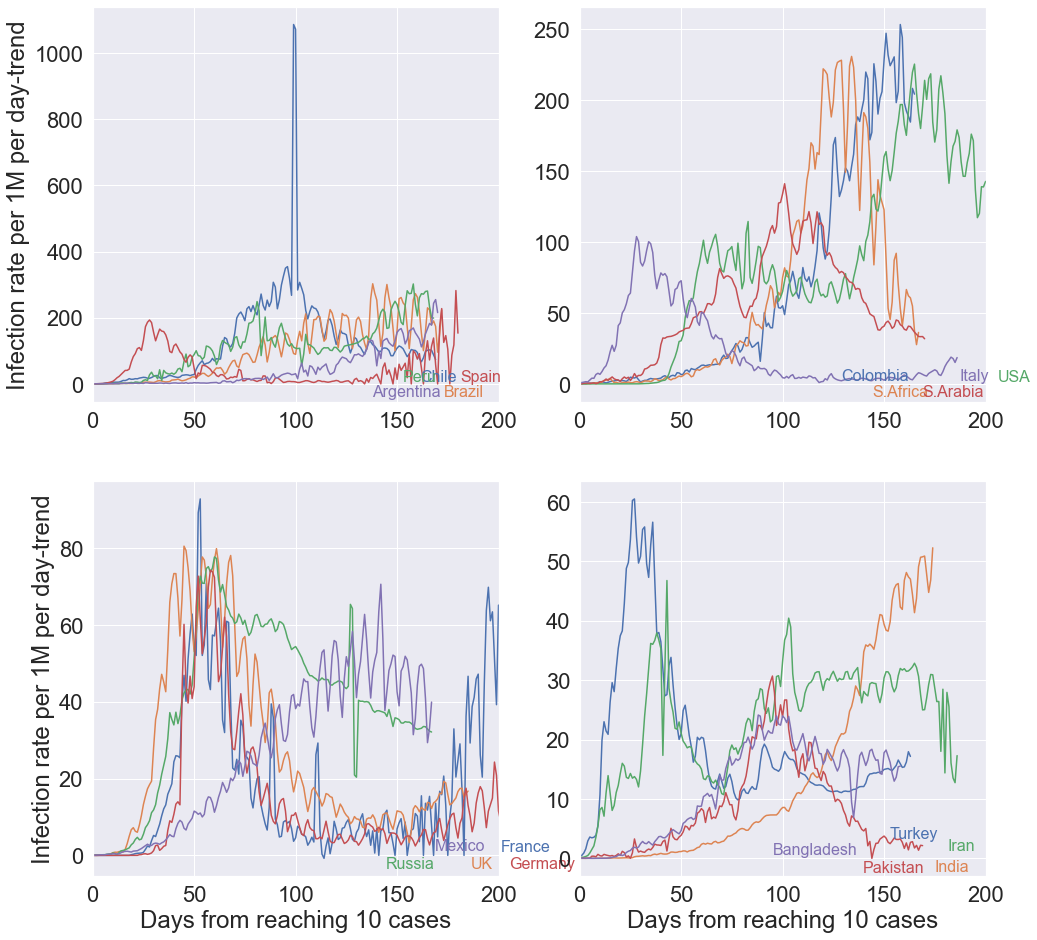

In [13]:
sns.set(rc={'figure.figsize':(16,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_1_5, markers=True, hue_order=Country_1_5, legend=False, ax=axes[0, 0])
texts = [axes[0, 0].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 0].get_lines()[Country_1_5.index(country)].get_c(), ha = 'left', va = 'center') for country in Country_1_5]
adjust_text(texts)
axes[0, 0].set_ylabel("Infection rate per 1M per day-trend",fontsize=24)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_6_10, markers=True, hue_order=Country_6_10, legend=False, ax=axes[0, 1])
texts = [axes[0, 1].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[0, 1].get_lines()[Country_6_10.index(country)].get_c(), ha = 'left', va = 'top') for country in Country_6_10]
adjust_text(texts)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_11_15, markers=True, hue_order=Country_11_15, legend=False, ax=axes[1, 0])
texts = [axes[1, 0].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 0].get_lines()[Country_11_15.index(country)].get_c(), ha = 'left', va = 'center') for country in Country_11_15]
adjust_text(texts)
axes[1, 0].set_ylabel("Infection rate per 1M per day-trend",fontsize=24)
axes[1, 0].set_xlabel("Days from reaching {:.0f} cases".format(K),fontsize=24)

sns.lineplot(x="Days from 0", y="Slope", hue="Country", data=data_16_20, markers=True, hue_order=Country_16_20, legend=False, ax=axes[1, 1])
texts = [axes[1, 1].text(max_cases.loc[str(country)]['Days from 0'], slope_df.loc[str(country)]['Slope'].iloc[-1], str(country), fontsize=16, color=axes[1, 1].get_lines()[Country_16_20.index(country)].get_c(), ha = 'left', va = 'center') for country in Country_16_20]
adjust_text(texts)
axes[1, 1].set_xlabel("Days from reaching {:.0f} cases".format(K),fontsize=24)

axes[0, 1].set_ylabel("",fontsize=24)
axes[1, 1].set_ylabel("",fontsize=24)
axes[0, 0].set_xlabel("",fontsize=24)
axes[0, 1].set_xlabel("",fontsize=24)
axes[0, 1].set_xlim([0, 200])
axes[1, 1].set_xlim([0, 200])
axes[0, 0].set_xlim([0, 200])
axes[1, 0].set_xlim([0, 200])
# axes[0, 0].set_yscale('log')
# axes[0, 1].set_yscale('log')
# axes[1, 0].set_yscale('log')
# axes[1, 1].set_yscale('log')

plt.savefig('Task_2_Fig_2.1_Patel_Abhishek.png')